In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercari/sample_submission.csv
/kaggle/input/mercari/test.tsv
/kaggle/input/mercari/train.tsv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("/kaggle/input/mercari/train.tsv",sep="\t")

In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,1436222,Tarte rainforest after dark colored clay,1,Beauty/Makeup/Makeup Palettes,Tarte,36.0,1,"A brand-new, unused, unopened, undamaged item...."
1,402989,Mac mineralize skin finish,3,Beauty/Makeup/Face,MAC,15.0,1,"Color is gold deposit, about 85% of product left"
2,638275,White Case iPhone 6/6s,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,3.0,1,New Ultra thin Candy TPU Silicone Rubber Soft
3,1113629,Victoria's Secret push-up plunge,3,Women/Underwear/Bras,Victoria's Secret,18.0,1,VS sexy little thing multi way bras both size ...
4,328823,Disney Princess Toddler Boots Size 10,2,Kids/Girls 2T-5T/Shoes,Disney,13.0,1,New with out box!


### Missing values

In [5]:
train.isna().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037774 entries, 0 to 1037773
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1037774 non-null  int64  
 1   name               1037774 non-null  object 
 2   item_condition_id  1037774 non-null  int64  
 3   category_name      1033392 non-null  object 
 4   brand_name         594827 non-null   object 
 5   price              1037774 non-null  float64
 6   shipping           1037774 non-null  int64  
 7   item_description   1037772 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 63.3+ MB


### brand_name and categpry have some null value

### price

In [7]:
train.price.describe().apply(lambda x: format(x,'f'))

count    1037774.000000
mean          26.734936
std           38.620504
min            0.000000
25%           10.000000
50%           17.000000
75%           29.000000
max         2004.000000
Name: price, dtype: object

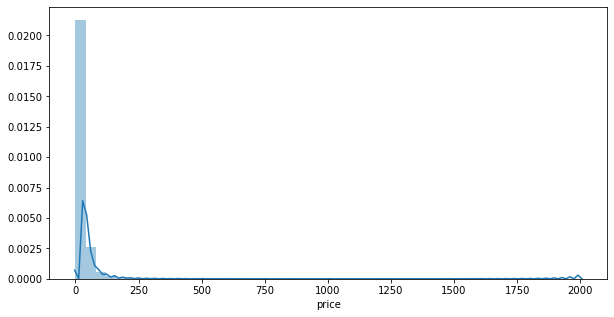

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(train.price)

#### **Price distribution is extremely skew and it ranges between 0 to 2004 with mean 26.7 and standard deviation 26.73.**

Text(0.5, 0, 'price')

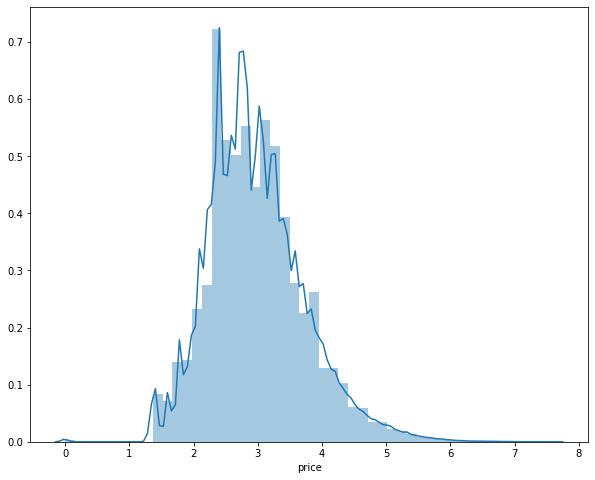

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(np.log(train.price.values+1))
plt.xlabel('price')

In [10]:
train['log_price'] = np.log(train.price.values+1)

In [11]:
percentile =[]
out = []
for i in range(0,101,5):
    percentile.append(i)
    out.append(np.round(np.percentile(train.price.values,i),3))
    print(i,"\t",np.round(np.percentile(train.price.values,i),3))

0 	 0.0
5 	 6.0
10 	 7.0
15 	 9.0
20 	 10.0
25 	 10.0
30 	 12.0
35 	 13.0
40 	 14.0
45 	 16.0
50 	 17.0
55 	 19.0
60 	 20.0
65 	 24.0
70 	 26.0
75 	 29.0
80 	 34.0
85 	 40.0
90 	 51.0
95 	 75.0
100 	 2004.0


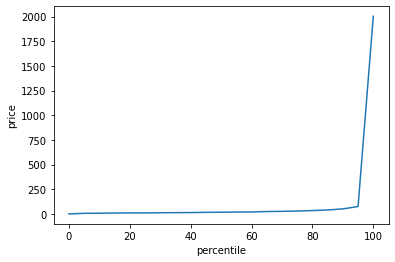

In [12]:
plt.xlabel("percentile")
plt.ylabel("price")
sns.lineplot(x=percentile,y=out)

99.0 	 170.0
99.1 	 180.0
99.2 	 189.0
99.3 	 200.0
99.4 	 210.0
99.5 	 231.0
99.6 	 256.0
99.7 	 289.0
99.8 	 340.0
99.9 	 450.0
100.0 	 2004.0


Text(0, 0.5, 'price')

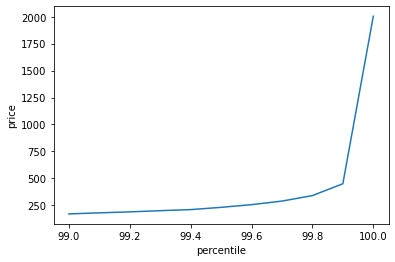

In [13]:
percentile =[]
out = []
lst = np.linspace(99,100,11)
for i in lst:
    percentile.append(i)
    out.append(np.round(np.percentile(train.price.values,i),3))
    print(i,"\t",np.round(np.percentile(train.price.values,i),3))
sns.lineplot(x=percentile,y=out)
plt.xlabel("percentile")
plt.ylabel("price")

**It can be noted that 99.9 percentile value is around 450 and inflection point occurs after that**

### shipping

In [14]:
train.groupby("shipping")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
shipping,,,,,,,,
0,573836.0,30.119971,39.450359,0.0,13.0,20.0,33.0,2004.0
1,463938.0,22.548052,37.144438,0.0,8.0,14.0,25.0,2000.0


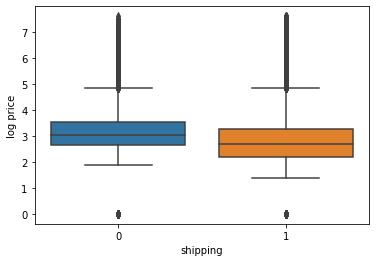

In [15]:
plt.xlabel("shipping")
plt.ylabel("log price")
sns.boxplot(x=train.shipping.values, y=train.log_price.values)

#### **Shipping status is binary i.e 0 and 1 where 0 represents buyer have to pay shipping charges and 1 means shipping is free. Around 55% of products come under 0 i.e buyers need to pay for shipping from their pocket. And also product with no shipping charges are marked price higher**

In [16]:
train.shipping.value_counts()/train.shape[0]*100

0    55.294891
1    44.705109
Name: shipping, dtype: float64

55% product buyer have to pay price

### item condition

In [17]:
train.groupby("item_condition_id")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
item_condition_id,,,,,,,,
1,448408.0,26.446627,35.386094,0.0,10.0,18.0,30.0,2000.0
2,262565.0,27.614484,42.425313,0.0,11.0,17.0,29.0,2004.0
3,302823.0,26.548411,39.857080,0.0,11.0,16.0,28.0,2000.0
4,22307.0,24.325907,36.461748,0.0,10.0,15.0,26.0,1309.0
5,1671.0,31.859964,39.985201,0.0,11.0,19.0,35.0,522.0


Text(0, 0.5, 'log pice')

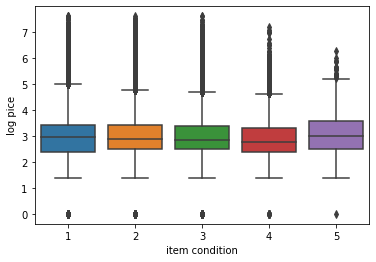

In [18]:
sns.boxplot(x=train.item_condition_id.values, y=train.log_price.values)
plt.xlabel('item condition')
plt.ylabel('log pice')

***From the box plot, we can see that the difference in prices are statistically significant too. No missing values have been found in item condition.***

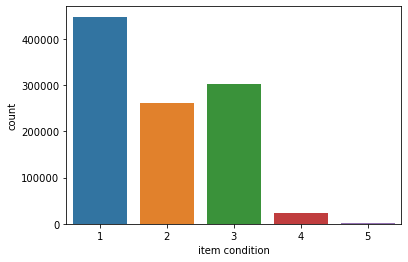

In [19]:
plt.xlabel("item condition")
sns.countplot(train.item_condition_id.values)

In [20]:
print("percentage")
train.item_condition_id.value_counts()/train.shape[0]*100

percentage


1    43.208637
3    29.180053
2    25.300788
4     2.149505
5     0.161018
Name: item_condition_id, dtype: float64

Products with item condition 1,2,3 have higher frequency compared to 4 and 5. There are very few products with item condition five.

### Brand name

In [21]:
print("null values: ", train.brand_name.isna().sum())
print("percentage null values: ", train.brand_name.isna().sum()/len(train)*100)

null values:  442947
percentage null values:  42.68241447559873


Brand feature contain around 42% null value this may be due to human error or just they are brand less.

In [22]:
print("percentage")
train.brand_name.value_counts()/len(train)*100

percentage


Nike                       3.647326
PINK                       3.626898
Victoria's Secret          3.242710
LuLaRoe                    2.092941
Apple                      1.167499
                             ...   
Gabriel                    0.000096
Lyons Hit Entertainment    0.000096
Meme                       0.000096
West Coast Choppers        0.000096
Linea Pelle                0.000096
Name: brand_name, Length: 4413, dtype: float64

In [23]:
train.groupby("brand_name").mean()["price"].sort_values(ascending=False).head(10)

brand_name
Proenza Schouler      645.500000
Mackage               450.000000
Demdaco               429.000000
Auto Meter            344.000000
MCM Worldwide         340.096154
Blendtec              315.000000
Oris                  300.000000
Celine                262.355556
Vitamix               259.125000
Valentino Garavani    258.000000
Name: price, dtype: float64

In [24]:
train.groupby("brand_name").median()["price"].sort_values(ascending=False).head(10)

brand_name
Proenza Schouler    645.5
Mackage             450.0
Demdaco             429.0
Auto Meter          344.0
Oris                300.0
Blendtec            280.0
Longines            254.0
Vitamix             244.5
Alexander Wang      235.0
Dainese             230.0
Name: price, dtype: float64

Proenza Schouler is the most expensive brand across all brands with a mean and median price of 645. Apple products are the most occurring brand with highest mean  value.


In [25]:
brand =(train.brand_name.value_counts()/len(train)*100).head(10).index

10 most occuring brand

In [26]:
brand_mean = []
df_brand_mean = train.groupby("brand_name").mean()["price"]
for b in brand:
    brand_mean.append(df_brand_mean[b])

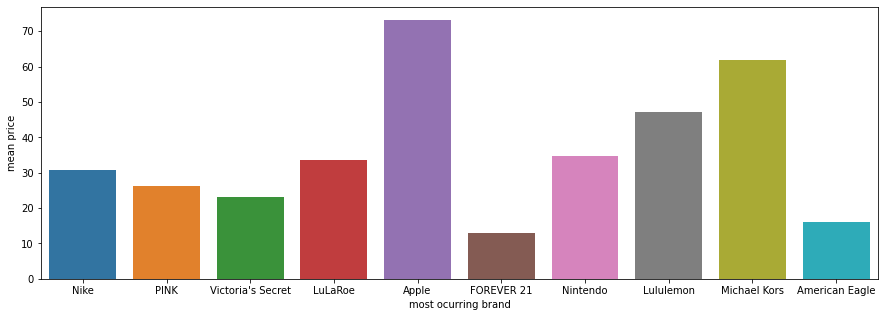

In [27]:
plt.figure(figsize = (15,5))
plt.ylabel("mean price")
plt.xlabel("most ocurring brand")
sns.barplot(x = brand,y=brand_mean)

Apple has highest mean in top occuring brand

In [28]:
train['brand_name'] = train['brand_name'].replace([np.nan], '')
wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(train.brand_name.astype(str)))
plt.figure(figsize = (20, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for brand name')
plt.show()

NameError: name 'WordCloud' is not defined

From word cloud we can see brands like Michael Kors, Victoria secret, American Eagle etc are most occurring brand.

### Category

In [29]:
train.category_name

0                              Beauty/Makeup/Makeup Palettes
1                                         Beauty/Makeup/Face
2          Electronics/Cell Phones & Accessories/Cases, C...
3                                       Women/Underwear/Bras
4                                     Kids/Girls 2T-5T/Shoes
                                 ...                        
1037769                 Women/Athletic Apparel/Shirts & Tops
1037770                                    Women/Shoes/Boots
1037771                           Men/Men's Accessories/Hats
1037772                           Men/Men's Accessories/Hats
1037773                             Women/Jeans/Slim, Skinny
Name: category_name, Length: 1037774, dtype: object

We have 5 levels of category in which level 4 and 5 are mostly null.

In [30]:
train[['cat1','cat2','cat3','cat4','cat5']] = train['category_name'].str.split('/', 0, expand=True)
train.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,cat1,cat2,cat3,cat4,cat5
0,1436222,Tarte rainforest after dark colored clay,1,Beauty/Makeup/Makeup Palettes,Tarte,36.0,1,"A brand-new, unused, unopened, undamaged item....",3.610918,Beauty,Makeup,Makeup Palettes,None,None
1,402989,Mac mineralize skin finish,3,Beauty/Makeup/Face,MAC,15.0,1,"Color is gold deposit, about 85% of product left",2.772589,Beauty,Makeup,Face,None,None
2,638275,White Case iPhone 6/6s,1,"Electronics/Cell Phones & Accessories/Cases, C...",,3.0,1,New Ultra thin Candy TPU Silicone Rubber Soft,1.386294,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",None,None


In [31]:
train[['cat1','cat2','cat3','cat4','cat5']].isna().sum()

cat1       4382
cat2       4382
cat3       4382
cat4    1034658
cat5    1035597
dtype: int64

most of the value in  cat4 and cat5 are null

In [32]:
text_cat1 = " ".join(cat for cat in train.cat1.values.astype(str))
text_cat2 = " ".join(cat for cat in train.cat2.values.astype(str))
text_cat3 = " ".join(cat for cat in train.cat3.values.astype(str))
text_cat = text_cat1 + text_cat2 + text_cat3

In [33]:
from wordcloud import WordCloud

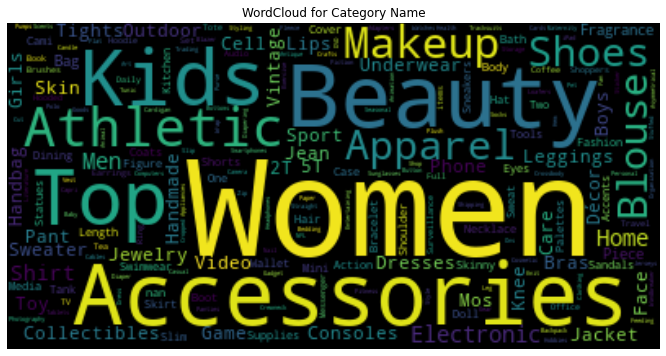

In [34]:
wordcloud = WordCloud(collocations=False).generate(text_cat)

plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Category Name')
plt.show()

By looking at word cloud we can see most of product are of women, beauty,makeup etc

### name

In [35]:
!pip install contractions

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [36]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import contractions

In [37]:
stop_words = set(stopwords.words('english'))-{"no","nor","not"}

In [38]:
lem = WordNetLemmatizer()
def text_prep(val):
    val = val.replace('\\r',' ')
    val = val.replace('\\"',' ')
    val = val.replace('\\n',' ')
    val = re.sub('[^A-Za-z0-9]+',' ',val)
    val = contractions.fix(val)
    val = ' '.join(lem.lemmatize(v) for v in val.split() if v.lower() not in stop_words)
    val = val.lower().strip()
    return val

In [39]:
train["processed_name"] = train.name.apply(text_prep)

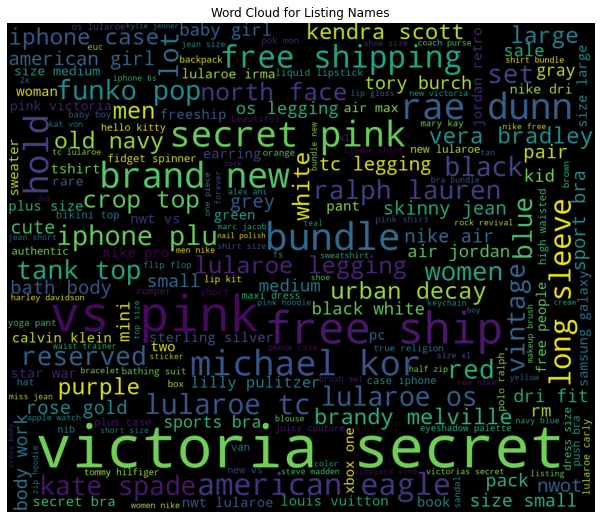

In [40]:
wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(train.processed_name.astype(str)))
plt.figure(figsize = (20, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Listing Names')
plt.show()


There is an interesting finding from the word cloud of names. Some brand names appear in the name feature. So we can use it to fill missing values in brand_name. Also

### item description

In [41]:
train['item_description'] = train['item_description'].replace([np.nan,'No description yet'], '')
train["processed_description"] = train.item_description.apply(text_prep)

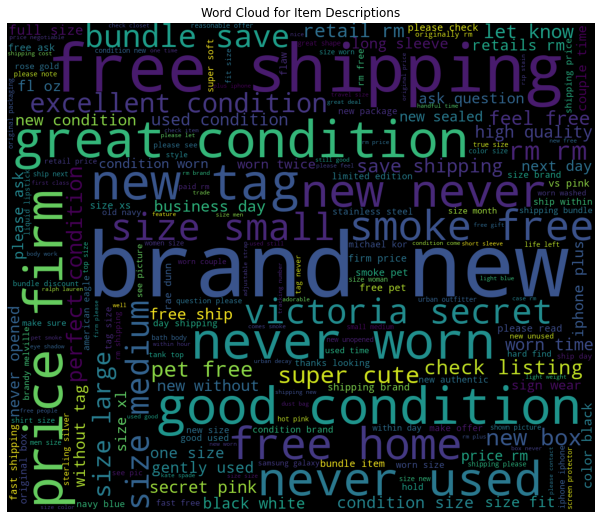

In [42]:
wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(train.processed_description.astype(str)))
plt.figure(figsize = (20, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Item Descriptions')
plt.show()

Words like free shipping, brand new, new etc are seem to used to lure the customer.

In [43]:

train["text"]=train["processed_description"]+" "+train["processed_name"]+' '+train['cat1']+" "+train['cat2']+" "+train['cat3']
train['newname']=train['processed_name']+' '+train['brand_name']

In [44]:
train['desc_length'] = train.text.apply(lambda x: len(str(x).split()))

In [45]:
train['name_length'] = train.newname.apply(lambda x: len(str(x).split()))

### Sentiment analysis

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [47]:
sid = SentimentIntensityAnalyzer()

In [48]:
train['process_negative'],train['process_neutral'],train['process_positive'],train['process_compound'] = zip(*train.processed_description.apply(lambda x: sid.polarity_scores(x).values()))

In [49]:
dis_columns=['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description','cat1','cat2','cat3','cat4','cat5','processed_name','processed_description',
           'text']

In [50]:
col = [x for x in list(train.columns) if x not in dis_columns]

In [51]:
col

['log_price',
 'newname',
 'desc_length',
 'name_length',
 'process_negative',
 'process_neutral',
 'process_positive',
 'process_compound']

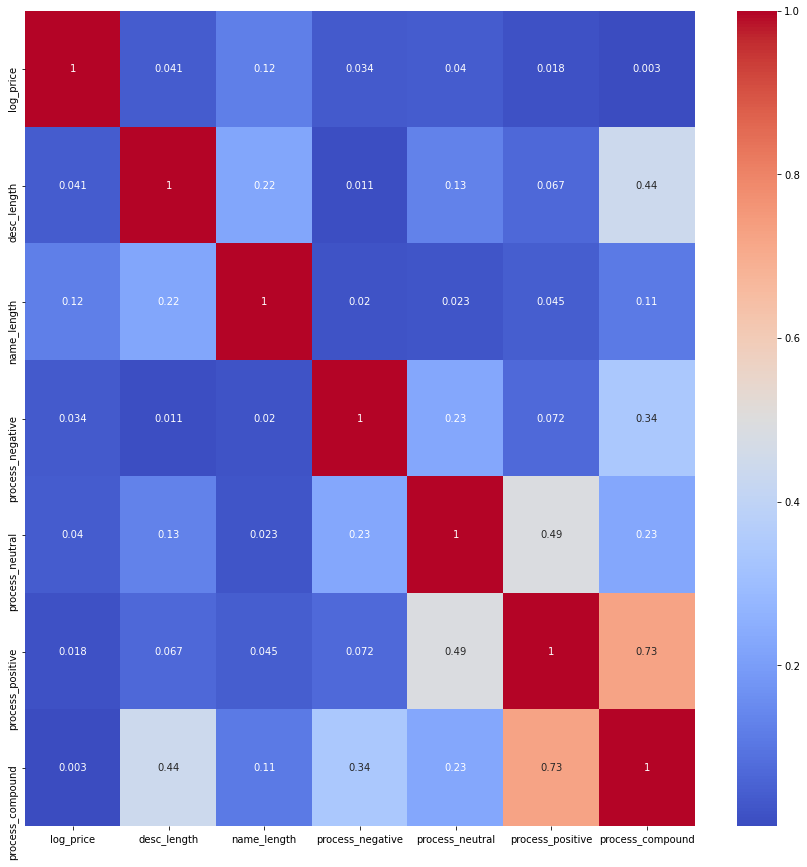

In [52]:
corrMatrix = train[col].corr().abs()
plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix,cmap='coolwarm',annot=True)

Here is a heatmap between log price, desc length, name length and sentiment scores. We find there is no correlation between price and these features.
